In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

<Figure size 1500x800 with 0 Axes>

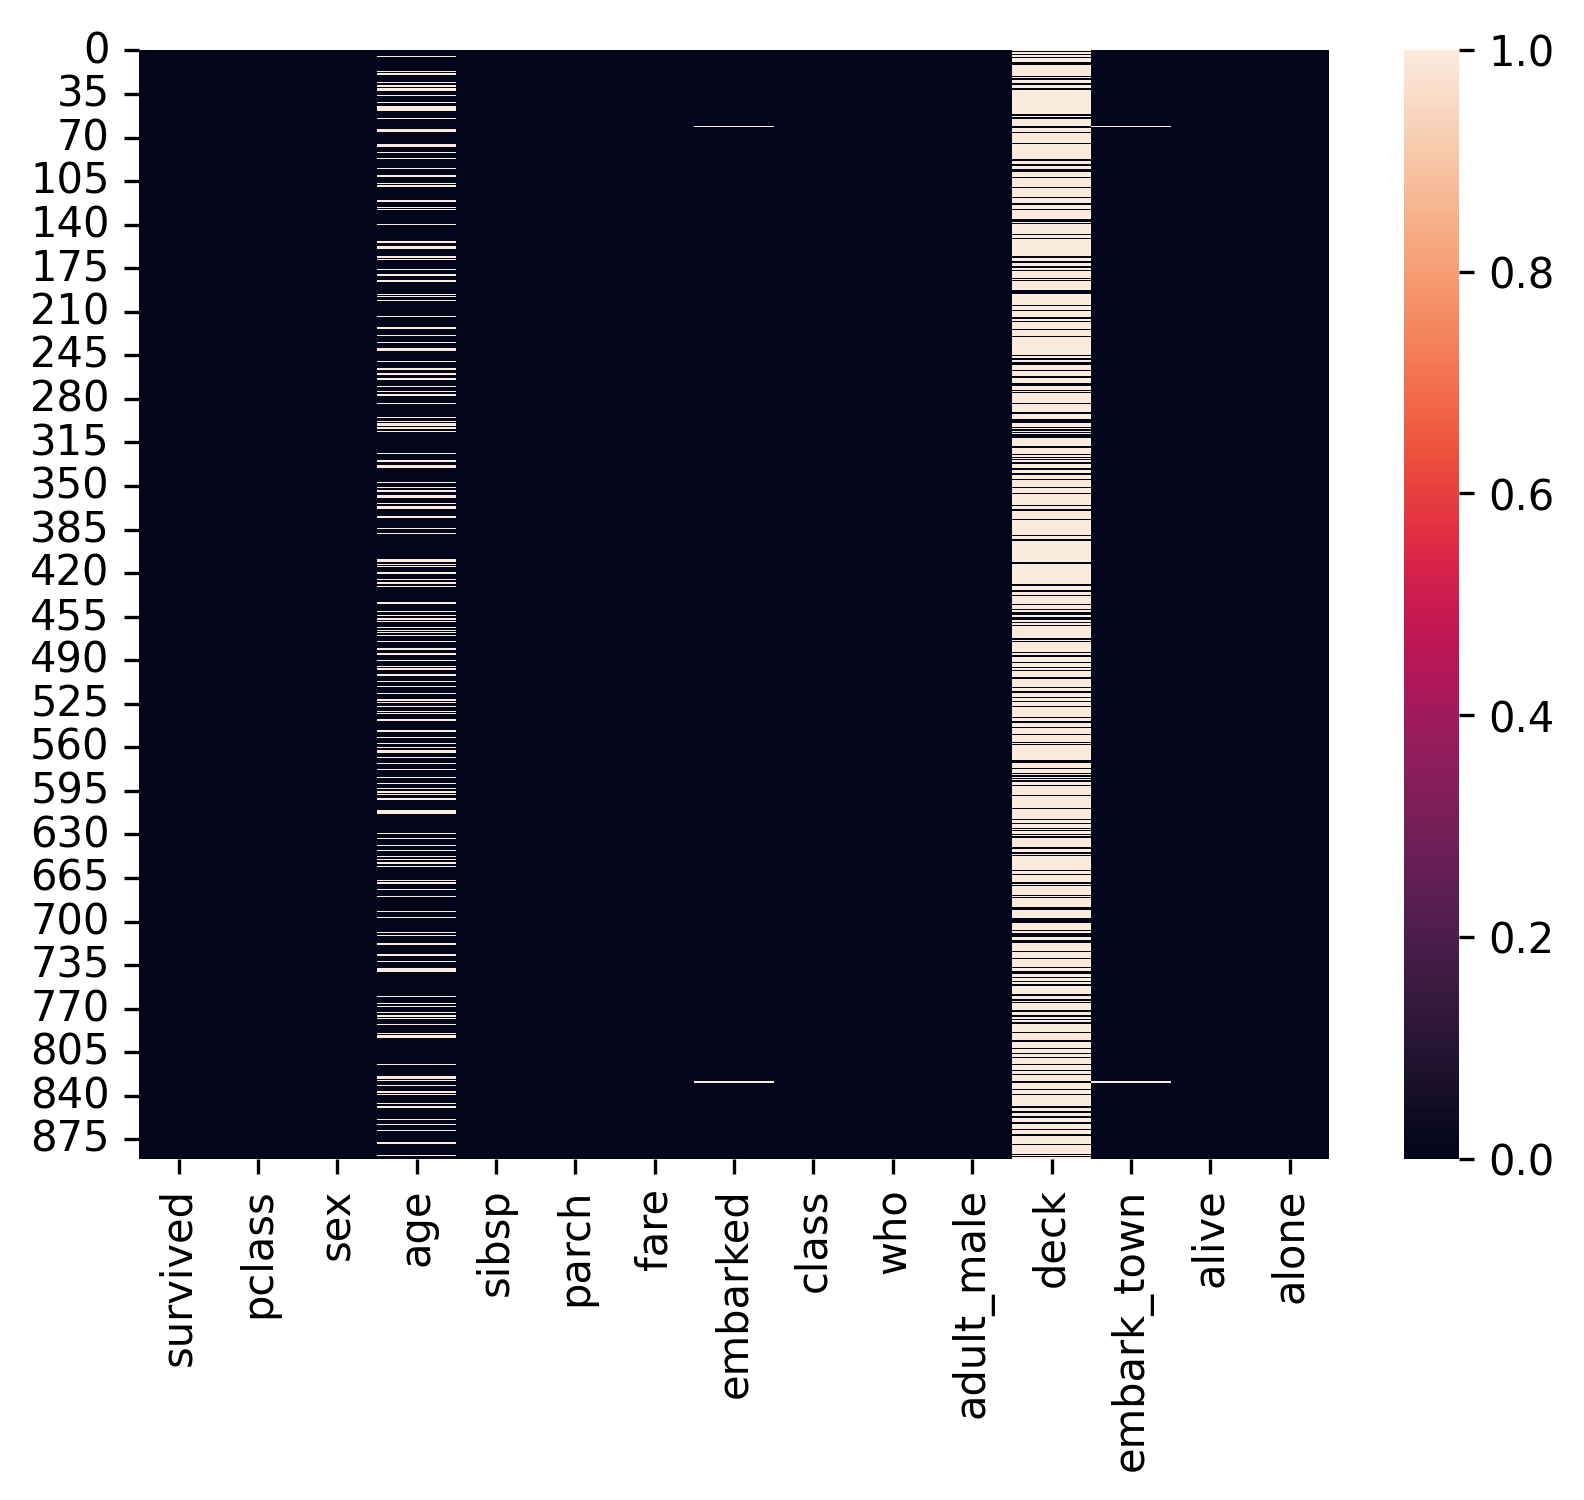

In [4]:
plt.figure(figsize=(15,8))
plt.figure(dpi=300)
sns.heatmap(titanic.isna())

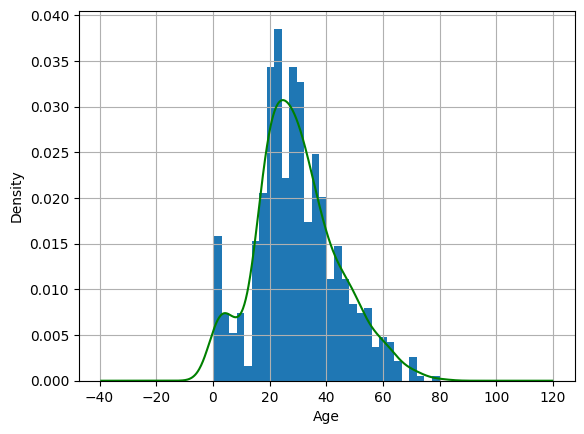

In [5]:
plt.xlabel('Age')
titanic['age'].hist(bins= 30, density= True)
titanic['age'].plot(kind = 'density', color= 'green')
plt.grid()

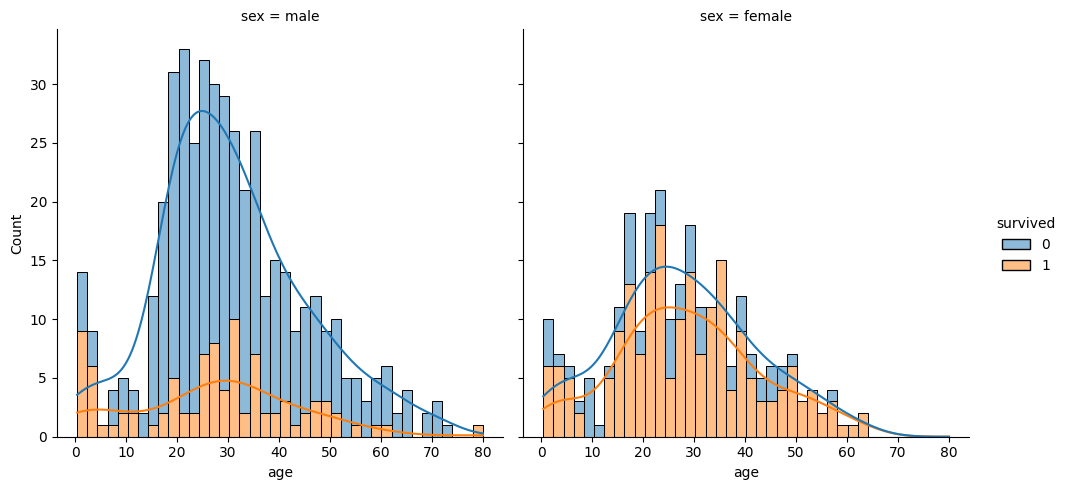

In [6]:
sns.displot(data= titanic, x='age', hue= 'survived', multiple= 'stack', bins= 40, kde = True, col= 'sex')

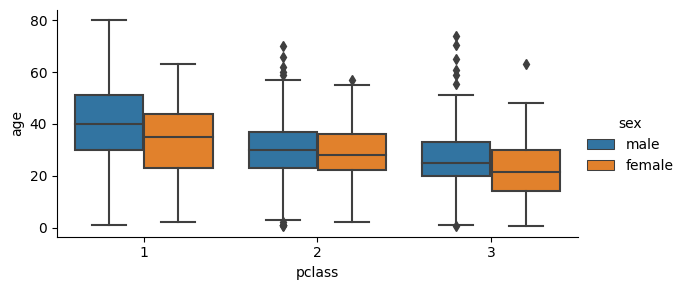

In [7]:
sns.catplot(data= titanic, x='pclass', y='age', hue='sex', kind='box', height=3,aspect=2)

In [8]:
titanic[(titanic['sex'] == 'male') & (titanic['pclass'] == 3)]['age'].mean(), titanic[titanic['sex'] == 'female']['age'].mean()

(26.507588932806325, 27.915708812260537)

In [9]:
def impute_age(sex, pclass):
    if sex == 'male':
        if pclass == 1:
            return titanic[(titanic['sex'] == 'male') & (titanic['pclass'] == 1)]['age'].mean()
        elif pclass == 2:
            return titanic[(titanic['sex'] == 'male') & (titanic['pclass'] == 2)]['age'].mean()
        elif pclass == 3:
            return titanic[(titanic['sex'] == 'male') & (titanic['pclass'] == 3)]['age'].mean()
    else:
        if pclass == 1:
            return titanic[(titanic['sex'] == 'female') & (titanic['pclass'] == 1)]['age'].mean()
        elif pclass == 2:
            return titanic[(titanic['sex'] == 'female') & (titanic['pclass'] == 2)]['age'].mean()
        elif pclass == 3:
            return titanic[(titanic['sex'] == 'female') & (titanic['pclass'] == 3)]['age'].mean()

In [10]:
titanic['age'] = titanic.apply(lambda x: impute_age(x['sex'], x['pclass']) if np.isnan(x['age']) else x['age'], axis=1)

In [11]:
titanic['embarked'].fillna('S', inplace= True)

In [12]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.00,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.75,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.00,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
titanic.drop(['embark_town', 'deck', 'alive'], inplace= True, axis= 1)

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


<Axes: >

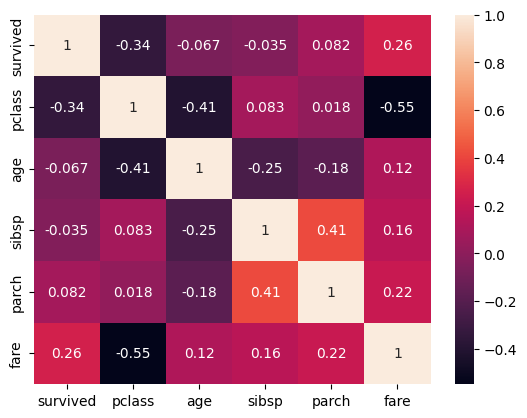

In [16]:
numeric_cols = titanic.select_dtypes(include= np.number).columns.tolist()
sns.heatmap(titanic[numeric_cols].corr(), annot= True)

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [18]:
newdata = titanic.copy()
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [19]:
titanic.drop(['class'], axis= 1, inplace=True)

In [20]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['adult_male'] = titanic['adult_male'].map({True: 1, False: 0})
titanic['alone'] = titanic['alone'].map({True: 1, False: 0})
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   who         891 non-null    object 
 9   adult_male  891 non-null    int64  
 10  alone       891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [21]:
titanic = pd.get_dummies(titanic, columns=['embarked', 'who'])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   adult_male  891 non-null    int64  
 8   alone       891 non-null    int64  
 9   embarked_C  891 non-null    uint8  
 10  embarked_Q  891 non-null    uint8  
 11  embarked_S  891 non-null    uint8  
 12  who_child   891 non-null    uint8  
 13  who_man     891 non-null    uint8  
 14  who_woman   891 non-null    uint8  
dtypes: float64(2), int64(7), uint8(6)
memory usage: 68.0 KB


In [22]:
titanic.drop(['embarked_S','who_woman'], inplace=True, axis= 1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   adult_male  891 non-null    int64  
 8   alone       891 non-null    int64  
 9   embarked_C  891 non-null    uint8  
 10  embarked_Q  891 non-null    uint8  
 11  who_child   891 non-null    uint8  
 12  who_man     891 non-null    uint8  
dtypes: float64(2), int64(7), uint8(4)
memory usage: 66.3 KB


In [23]:
titanic = pd.get_dummies(titanic, columns=['pclass'])

In [24]:
titanic.drop(['pclass_3'], inplace=True, axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   sex         891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   adult_male  891 non-null    int64  
 7   alone       891 non-null    int64  
 8   embarked_C  891 non-null    uint8  
 9   embarked_Q  891 non-null    uint8  
 10  who_child   891 non-null    uint8  
 11  who_man     891 non-null    uint8  
 12  pclass_1    891 non-null    uint8  
 13  pclass_2    891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(6)
memory usage: 61.0 KB


In [25]:
titanic['age'] = titanic['age'].astype('int')
titanic['fare'] = titanic['fare'].astype('int')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   survived    891 non-null    int64
 1   sex         891 non-null    int64
 2   age         891 non-null    int32
 3   sibsp       891 non-null    int64
 4   parch       891 non-null    int64
 5   fare        891 non-null    int32
 6   adult_male  891 non-null    int64
 7   alone       891 non-null    int64
 8   embarked_C  891 non-null    uint8
 9   embarked_Q  891 non-null    uint8
 10  who_child   891 non-null    uint8
 11  who_man     891 non-null    uint8
 12  pclass_1    891 non-null    uint8
 13  pclass_2    891 non-null    uint8
dtypes: int32(2), int64(6), uint8(6)
memory usage: 54.1 KB


In [26]:
titanic

,survived,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,who_child,who_man,pclass_1,pclass_2
0,0,0,22,1,0,7,1,0,0,0,0,1,0,0
1,1,1,38,1,0,71,0,0,1,0,0,0,1,0
2,1,1,26,0,0,7,0,1,0,0,0,0,0,0
3,1,1,35,1,0,53,0,0,0,0,0,0,1,0
4,0,0,35,0,0,8,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27,0,0,13,1,1,0,0,0,1,0,1
887,1,1,19,0,0,30,0,1,0,0,0,0,1,0
888,0,1,21,1,2,23,0,0,0,0,0,0,0,0
889,1,0,26,0,0,30,1,1,1,0,0,1,1,0


<Axes: >

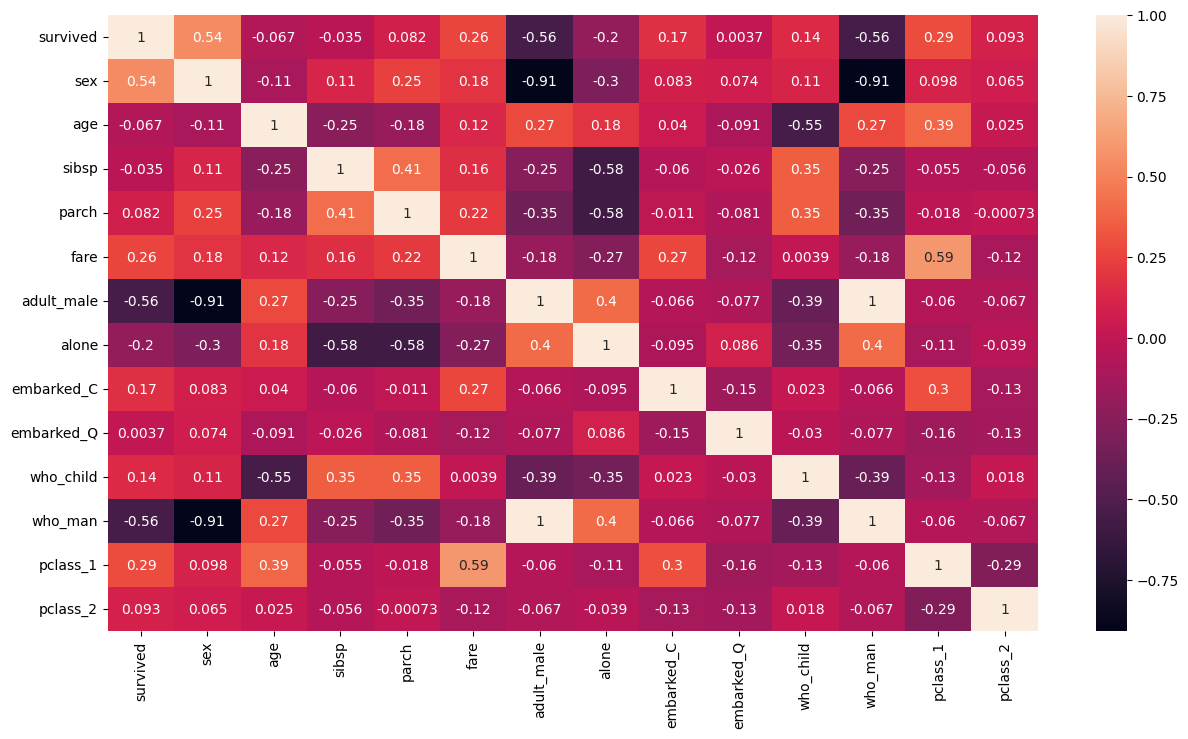

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(titanic.corr(), annot=True)

In [28]:
input_cols = titanic.columns[1:]
target_col = 'survived'

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic[input_cols],titanic[target_col],test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter= 300)
model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [31]:
y_predict = model.predict(X_test)

In [32]:
model.score(X_test, y_test)

0.8100558659217877

In [33]:
accuracy_score(y_predict,y_test)

0.8100558659217877

In [34]:
from sklearn.feature_selection import RFE

In [35]:
def find_best_feature(n):
    X_train, X_test, y_train, y_test = train_test_split(titanic[input_cols],titanic[target_col],test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter= 300)

    rfe = RFE(model, n_features_to_select=n, verbose=1)
    rfe.fit(X_train,y_train)
    selected_cols = X_train.columns[rfe.support_]

    model.fit(X_train[selected_cols], y_train)
    score = model.score(X_test[selected_cols], y_test)
    print(f'Selected features {n}: {list(X_train[selected_cols])}')
    print(f'score: {score}')
    print('===========================\n')

In [36]:
for i in range(X_train.shape[1]):
    find_best_feature(i+1)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Selected features 1: ['who_man']
score: 0.7877094972067039

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Selected features 2: ['who_man', 'pclass_1']
score: 0.7877094972067039

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Selected features 3: ['adult_male', 'who_man', 'pclass_1']
score: 0.7877094972067039

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 fea

In [37]:
X_train, X_test, y_train, y_test = train_test_split(titanic[input_cols],titanic[target_col],test_size=0.2, random_state=42)
model = LogisticRegression(max_iter= 300)

rfe = RFE(model, n_features_to_select=12, verbose=1)
rfe.fit(X_train,y_train)
selected_cols = X_train.columns[rfe.support_]

model.fit(X_train[selected_cols], y_train)
score = model.score(X_test[selected_cols], y_test)
X_train[selected_cols].columns

Fitting estimator with 13 features.


Index(['sex', 'age', 'sibsp', 'parch', 'adult_male', 'alone', 'embarked_C',
       'embarked_Q', 'who_child', 'who_man', 'pclass_1', 'pclass_2'],
      dtype='object')

In [44]:
input_cols = X_train.columns[rfe.support_]
X_train, X_test = X_train[input_cols], X_test[input_cols]

In [47]:
from sklearn.metrics import confusion_matrix

<Axes: >

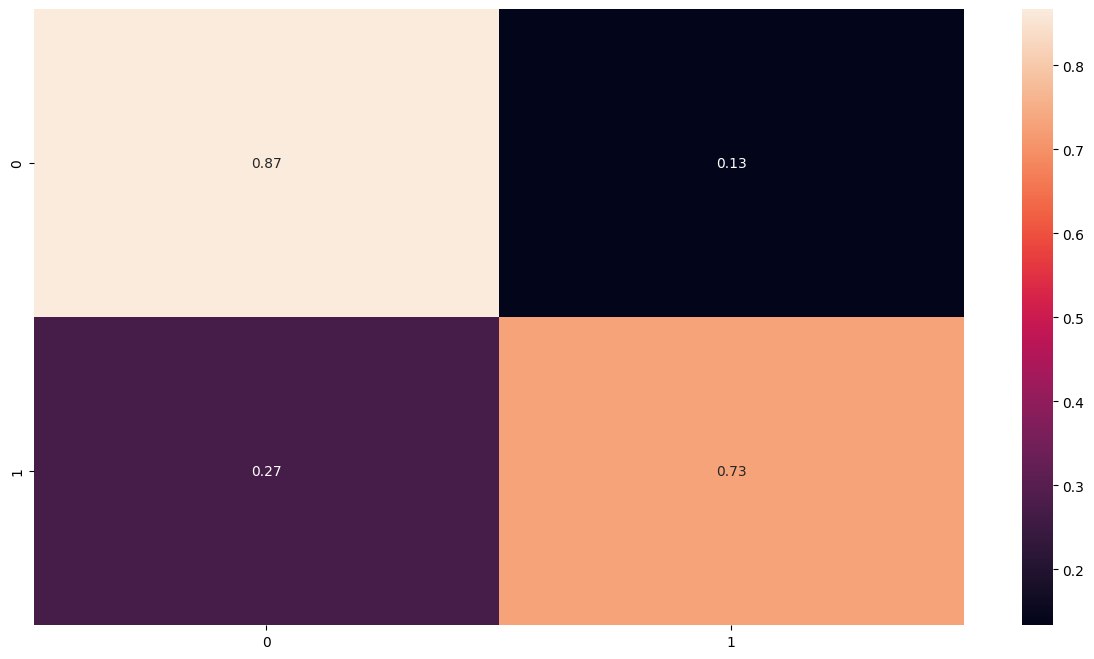

In [60]:
matrix  = confusion_matrix(y_test,y_predict, normalize='true')
plt.figure(figsize=(15,8))
sns.heatmap(matrix, annot=True)

In [61]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,y_predict)
f1

0.7605633802816901

In [63]:
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_predict = model.predict(X_test)

<Axes: >

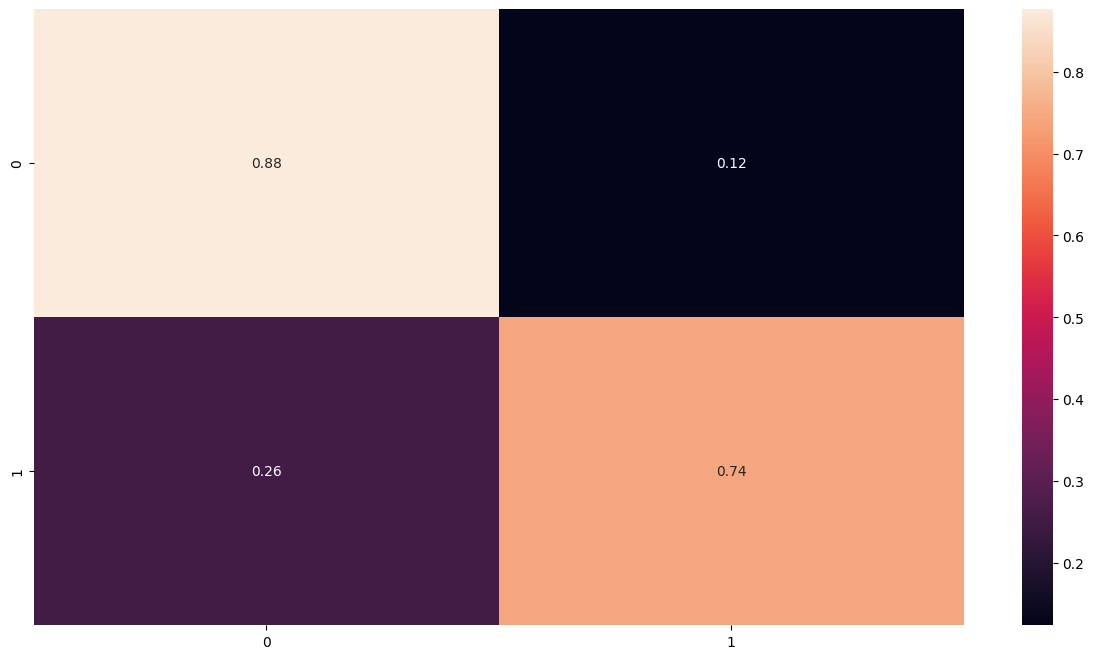

In [64]:
matrix  = confusion_matrix(y_test,y_predict, normalize='true')
plt.figure(figsize=(15,8))
sns.heatmap(matrix, annot=True)

In [65]:
f1 = f1_score(y_test,y_predict)
f1

0.7746478873239436

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

cross_val_score(model, X_train, y_train, cv= 5) 

array([0.84615385, 0.82517483, 0.81690141, 0.79577465, 0.83098592])

In [71]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



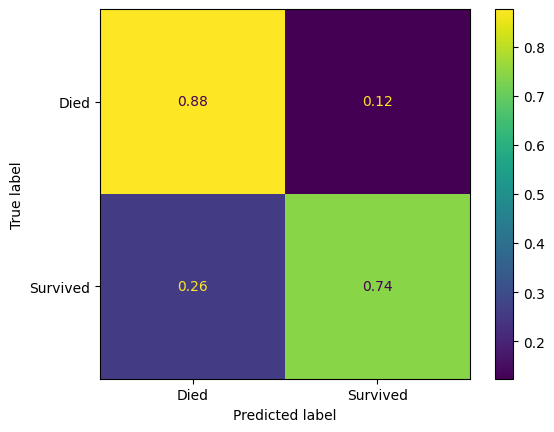

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(matrix, display_labels=['Died', 'Survived']).plot()

In [86]:
from sklearn.metrics import roc_curve, auc

[fpr, tpr, thr] = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

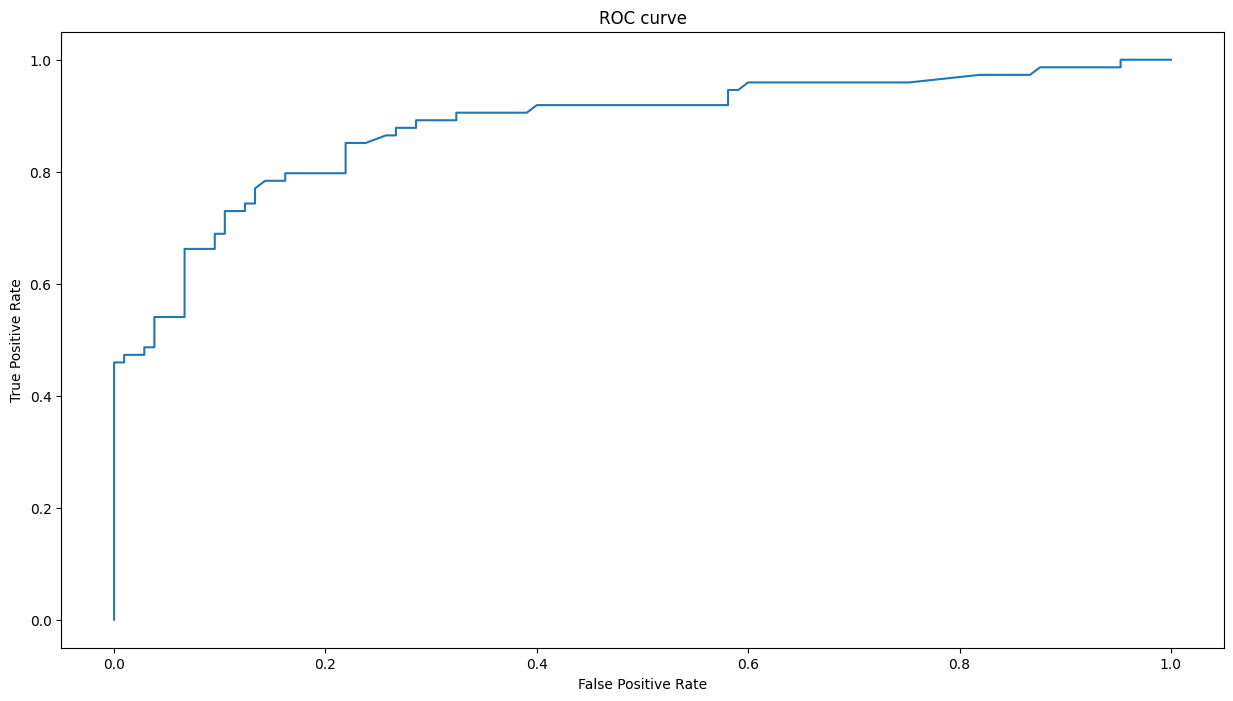

In [96]:
plt.figure(figsize=(15,8))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [102]:
idx = sum(fpr < 0.1) 
tpr[idx], thr[idx], fpr[idx]

(0.6891891891891891, 0.6468316384933399, 0.10476190476190476)